In [1]:
# Import libraries
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## Load data and similiarity scores

In [2]:
# Load the similarity scores
with open('data/similarity_scores.pkl', 'rb') as f:
    similarity_scores = pickle.load(f)
similarity_scores

{0: array([3.59668359e-02, 9.02648747e-01, 4.02319223e-01, 8.88849258e-01,
        8.95611644e-01, 1.36072212e-03, 9.40467179e-01, 7.85852611e-01,
        9.90465760e-01, 9.74412739e-01, 9.78032649e-01, 9.19051945e-01,
        1.19018376e-01, 9.83240068e-01, 9.42239106e-01, 6.62206173e-01,
        9.95077908e-01, 9.58876312e-01, 9.34606731e-01, 4.95481312e-01,
        8.81240845e-01, 5.45549512e-01, 8.85399342e-01, 9.96990561e-01,
        8.90858173e-01, 9.11172748e-01, 8.23289454e-01, 9.15236115e-01,
        9.48607087e-01, 3.19275320e-01, 9.86297548e-01, 9.15614963e-01,
        9.13956240e-02, 5.97991887e-03, 6.11339509e-01, 3.94387022e-02,
        9.78940308e-01, 8.62178743e-01, 3.95099133e-01, 9.86866593e-01,
        9.89779532e-01, 2.55432054e-02, 5.32213151e-01, 2.56425142e-01,
        8.98141682e-01, 3.77705365e-01, 7.64148414e-01, 9.27810848e-01,
        9.05472517e-01, 3.52712125e-01, 8.27024341e-01, 9.76525366e-01,
        1.48533601e-02, 9.21472490e-01, 4.00955796e-01, 5.773

In [3]:
# Load example classes
class_files = sorted([file for file in Path('data/example_classes/').rglob('*.zarr')])
# Manually create a map between class text and integer label
class_map = {0: 'banana', 1:'cacao', 2:'fruit', 3:'palmtree'}

class_data={}
for class_i in range(len(class_files)):
    class_data[class_i] = xr.open_zarr(class_files[class_i])

{0: <xarray.Dataset>
 Dimensions:  (sample: 432, x: 400, y: 400, channel: 3)
 Dimensions without coordinates: sample, x, y, channel
 Data variables:
     X        (sample, x, y, channel) float32 dask.array<chunksize=(1, 400, 400, 3), meta=np.ndarray>
 Attributes:
     description:  banana
     source:       https://github.com/gyrrei/ReforesTree,
 1: <xarray.Dataset>
 Dimensions:  (sample: 432, x: 400, y: 400, channel: 3)
 Dimensions without coordinates: sample, x, y, channel
 Data variables:
     X        (sample, x, y, channel) float32 dask.array<chunksize=(1, 400, 400, 3), meta=np.ndarray>
 Attributes:
     description:  cacao
     source:       https://github.com/gyrrei/ReforesTree,
 2: <xarray.Dataset>
 Dimensions:  (sample: 432, x: 400, y: 400, channel: 3)
 Dimensions without coordinates: sample, x, y, channel
 Data variables:
     X        (sample, x, y, channel) float32 dask.array<chunksize=(1, 400, 400, 3), meta=np.ndarray>
 Attributes:
     description:  fruit
     source:    

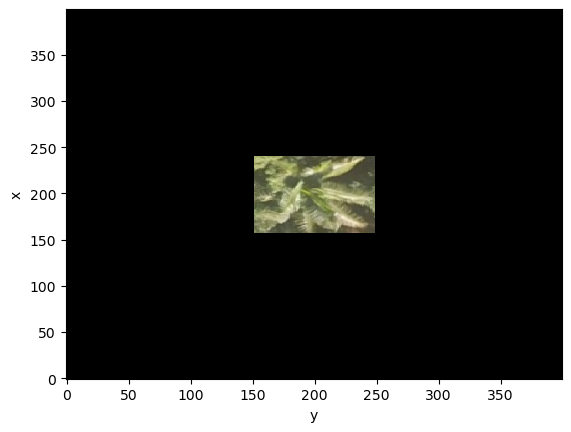

In [5]:
# Load and visualize the test sample
test_sample = xr.open_zarr('data/test_example_brazil.zarr')

# Visualize the test sample
test_sample['X'].astype('int').plot.imshow()

## Plot three most similar images per class

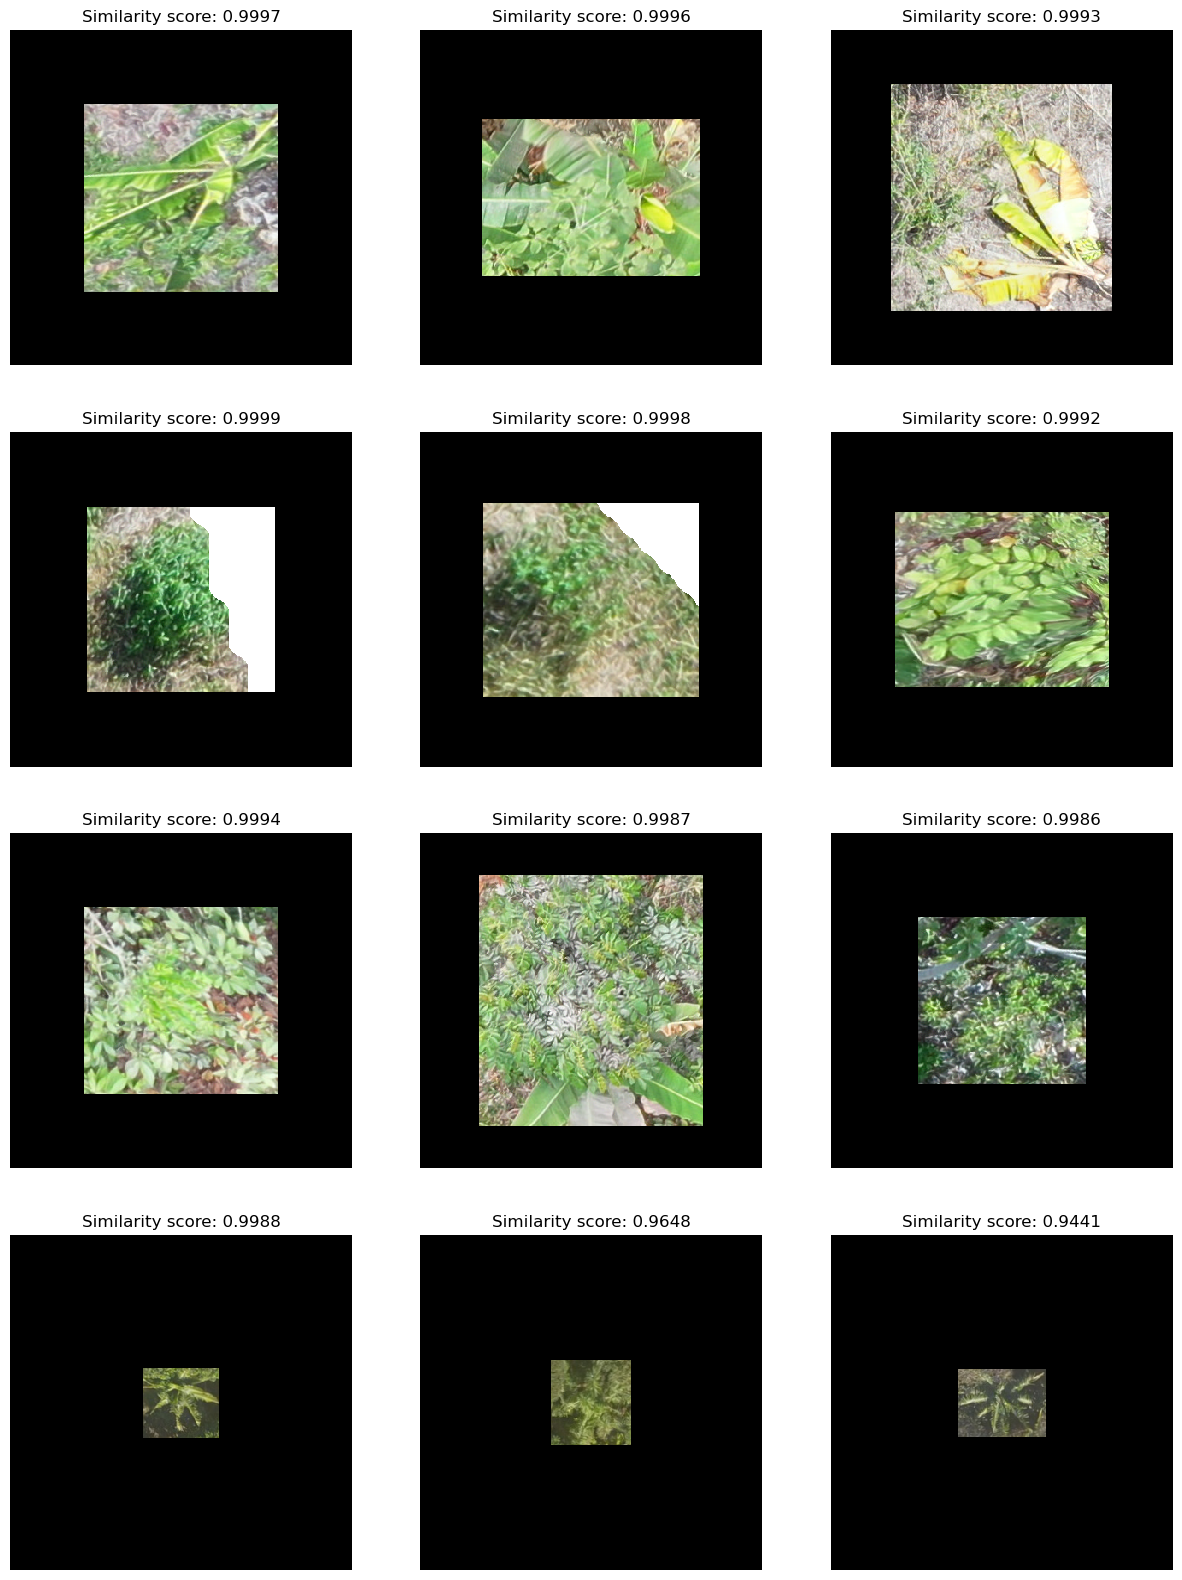

In [14]:
# Plot three most similar images per class
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
for class_i in range(len(class_files)):
    # Get the indices of the three highest similarity scores
    scores = similarity_scores[class_i]
    idx = np.argsort(scores)[::-1][:3]
    # Plot the three most similar images
    for i in range(3):
        class_data[class_i]['X'][idx[i]].astype('int').plot.imshow(ax=axs[class_i, i])
        axs[class_i, i].set_title(f"Similarity score: {scores[idx[i]]:.4f}")
        axs[class_i, i].axis('off')

## Plot the histogram of the similarity scores per class

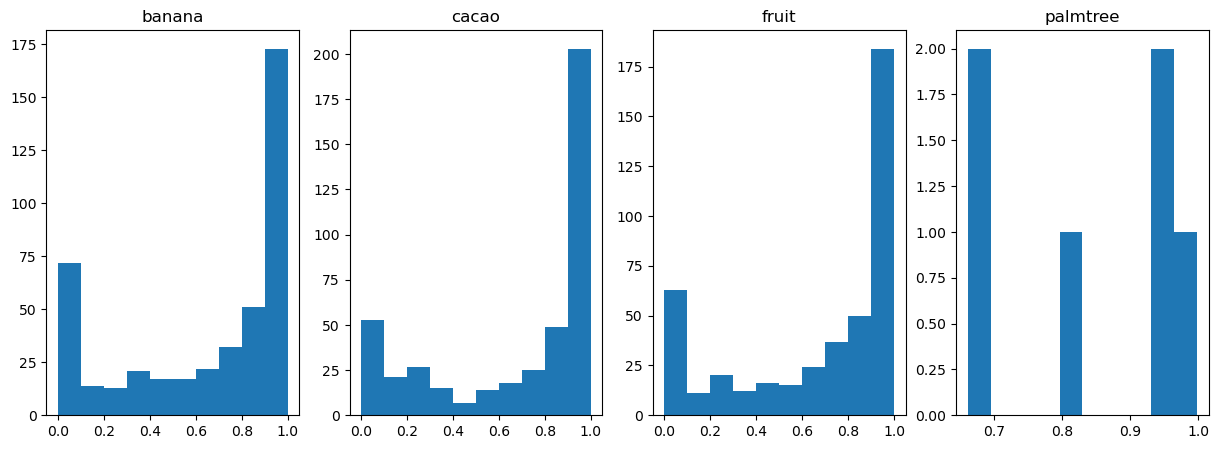

In [16]:
# Histogram of similarity scores per class
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for class_i in range(len(class_files)):
    axs[class_i].hist(similarity_scores[class_i], bins=10)
    axs[class_i].set_title(f"{class_map[class_i]}")